# Assignment 1: Approximation of mathematical functions

In [39]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{n=1}^\infty (-1)^{n+1}\frac{(x-1)^n}{n}
\end{align}

and converges to $\log$ for $0 < x < 2$. 

1. Implement `log1` that approximates $\log(x),\,0 < x < 2$. 



In [40]:
def log1(x,n):
  v=0
  pow=1
  s=1
  for i in range (1,n+1):
    v += (((x-1)**pow) / pow) * s
    pow += 1
    s *= -1
  return v

 2. * Plot  `math.log` and `log1` for $0.25 ≤ x ≤ 4$ for $n=1,2,4,8$.   
    * Plot the **absolute** error of `log1` compared to `math.log` on $0.01 ≤ x ≤ 1$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 

   


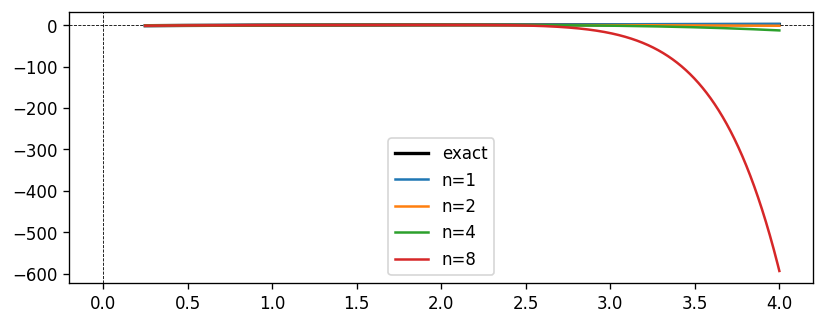

In [41]:
def plot_fun(f, g, min=0.25, max=4, logn_from=0, logn_till=4):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  plt.plot(x, g(x), label="exact", c='black', lw=2)
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      plt.plot(x, y, label=f"n={n}")
  plt.legend()

plot_fun(log1, numpy.log, min=0.25 , max=4)


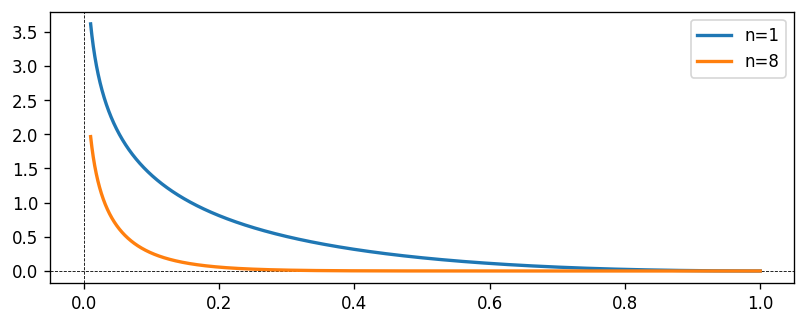

In [ ]:
def plot_err(f, g, min=0.01, max=1):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  plt.plot(x, numpy.abs(numpy.log(x) - log1(x,1)), label = "n=1", lw=2)
  plt.plot(x, numpy.abs(numpy.log(x) - log1(x,8)) , label = "n=8", lw=2)
  plt.legend()

plot_err(log1, numpy.log, min=0.01 , max=1)


3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.


In [42]:
def log2(x,n):
  e = 2.7182818284590455
  pow = 0
  while(x>=2): 
    x /= e               # Usage of the hint to get the power of e , then we can use log1
    pow += 1
  return pow + log1(x,n)

 4. * Plot  `math.log` and `log2` for $0.1 ≤ x ≤ 100$ for $n=1,2,4,8$.   
    * Plot the **relative** error of `log2` compared to `math.log` on $0.1 ≤ x ≤ 100$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 



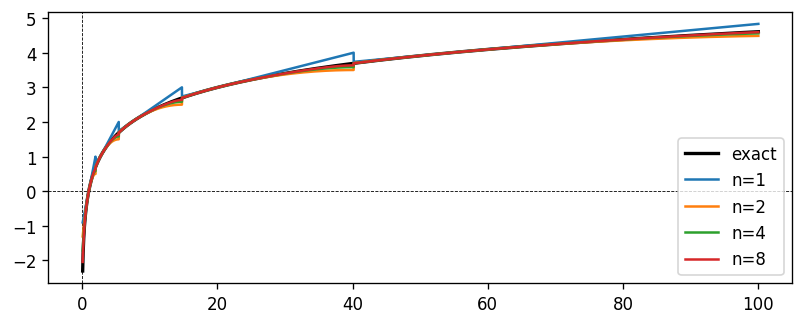

In [ ]:
plot_fun(log2,numpy.log,min=0.1,max=100)

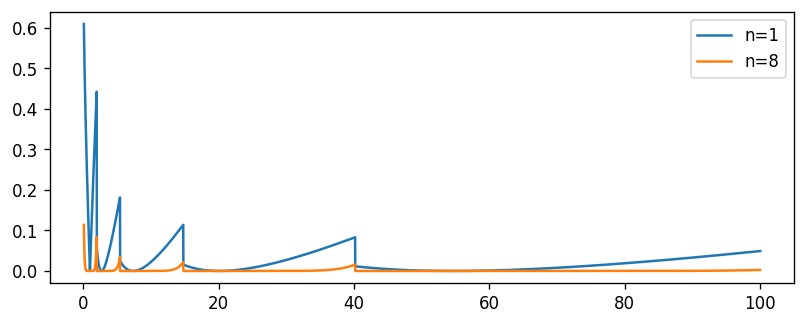

In [ ]:
def relErr(x,n):
  gap = numpy.log(x) - log2(x,n)
  return abs(gap) / abs(numpy.log(x))


def plot_rel(f,min=0.1,max=100,logn_from=0, logn_till=2):
  x=numpy.linspace(min, max, 10000)
  plt.figure(figsize=(8, 3)).set_dpi(120)
  for logn in range(logn_from, logn_till):
      n = 8**logn
      y = [f(x_, n) for x_ in x]
      plt.plot(x, y, label=f"n={n}")
  plt.legend()


plot_rel(relErr, min=0.1 , max=100)


5. What are the maximum absolute and relative errors of `log1` compared to `log2` on interval $0.25 ≤ x ≤ 1.75$? 

In [43]:
x=0.25
log1_val = log1(x,8)
log2_val = log2(x,8)
abs_diff = abs(log1_val-log2_val)
rel_diff = abs_diff // abs(log2_val)
x=0.26
while(x<=1.75):
  new_log1_val = log1(x,8)
  new_log2_val = log2(x,8)
  new_abs_diff = abs(new_log1_val-new_log2_val)
  new_rel_diff = new_abs_diff // abs(new_log2_val)
  if new_abs_diff > abs_diff:
    abs_diff=new_abs_diff
  if new_rel_diff > rel_diff:
    rel_diff=new_rel_diff
  x += 0.01
print("maximum absolute error = %d" %abs_diff + " ,  max relative error = %d" %rel_diff)  # in the requested domain answers should be 0 because x<=1.75<2

maximum absolute error = 0 ,  max relative error = 0


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `logfact`  from [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF) with `math.log` and `math.exp`, to implement the [multinomial coefficients](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients) for $m=3$ on the log scale:

$$\binom{n}{k_1,k_2,...,k_m} = \frac{n!}{k_1! k_2! \cdot\cdot\cdot k_m!}$$


In [ ]:
def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf



In [ ]:
def multinomialC(k1, k2, k3):
  n=k1+k2+k3
  return round(math.exp(logfact(n) - logfact(k1) - logfact(k2) - logfact(k3)))

2. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement the approximate computation of the multinomial coefficients for $m=3$:


In [ ]:
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result

def exp2(x, n):
  e = 2.7182818284590455
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

def logfact2(n,m):
  logf = 0
  for i in range(n):
    logf += log2(i + 1,m) #m for x^10 approximation
  return logf

def approxM(k1,k2,k3,m):
  n=k1+k2+k3
  return round(exp2(logfact2(n,m) - logfact2(k1,m) - logfact2(k2,m) - logfact2(k3,m),m))


3. Compute $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$. Compare the running times of `multinomial coefficients` using `log2` and `exp2` vs. `math.log` and `math.exp`.


In [ ]:
%time print(multinomialC(2,2,6))
%time print(approxM(2,2,6,8))
print("-------------------------------")
%time print(multinomialC(100,25,25))
%time print(approxM(100,25,25,8))

1260
CPU times: user 908 µs, sys: 0 ns, total: 908 µs
Wall time: 919 µs
1260
CPU times: user 629 µs, sys: 0 ns, total: 629 µs
Wall time: 643 µs
-------------------------------
2544476232379045785963458409835886714436879363285712896
CPU times: user 653 µs, sys: 0 ns, total: 653 µs
Wall time: 659 µs
2074562095840296896437726896697998241925609512983592960
CPU times: user 1.7 ms, sys: 0 ns, total: 1.7 ms
Wall time: 1.7 ms


4. What are the absolute and relative error of `multinomial coefficients` for each combination of arguments — $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$?


In [ ]:
abs1 = abs(multinomialC(2,2,6)- approxM(2,2,6,8))
print("absolute error of (10,2,2,6) = %d"  % abs1)
rel1 = abs1 / multinomialC(2,2,6)
print("relative error of (10,2,2,6) = %d"  % rel1)
abs2 = abs(multinomialC(100,25,25)- approxM(100,25,25,8))
print(f"absolute error of (150,100,25,25) =  {abs2:6g}")
rel2 = abs2 / multinomialC(100,25,25)
print(f"relative error of (150,100,25,25) = {rel2:.8f}")

absolute error of (10,2,2,6) = 0
relative error of (10,2,2,6) = 0
absolute error of (150,100,25,25) =  4.69914e+53
relative error of (150,100,25,25) = 0.18468010


5. For which $n$(number of Taylor series terms) the absolute difference between the *relative errors* of $\binom{1000}{900, 50,50}$ computed for `n` and `n+1` is smaller than 0.1%? Use the approximation from Q2.2 

In [ ]:
n=1
rel_err = 1     #setting the value to 1 to enter the while loop
val = multinomialC(900,50,50)
while(rel_err>=0.1):
  rel_n = abs(val - approxM(900,50,50,n)) / val*100
  rel_n_next = abs(val - approxM(900,50,50,n+1)) / val*100
  rel_err = abs(rel_n - rel_n_next)
  n+=1
  
print("the requested n =  %d" % (n-1))


the requested n =  13
